In [1]:
import pandas as das

In [2]:
import numpy as py

In [3]:
import matplotlib.pyplot as plot
%matplotlib inline

In [4]:
import seaborn as sea

In [6]:
sea.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [45]:
dataset = sea.load_dataset('diamonds')

In [46]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
data = dataset.drop(["cut","color","clarity","depth","table","x","y","z"],axis=1)

In [50]:
data

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [51]:
x = data.iloc[:,-1].values.reshape(-1,1)
y = data.iloc[:,0].values.reshape(-1,1)

In [52]:
x

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

In [53]:
y

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

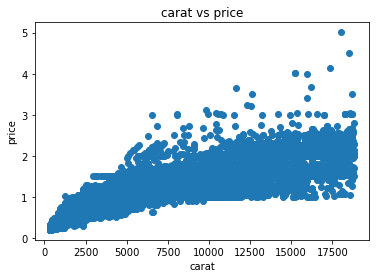

In [55]:
plot.scatter(x,y)
plot.title('carat vs price')
plot.xlabel('carat')
plot.ylabel('price')
plot.show()


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
x_train.shape

(43152, 1)

In [59]:
y_train.shape

(43152, 1)

In [60]:
from sklearn.linear_model import LinearRegression

In [62]:
lm.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred = lm.predict(x_test)
y_pred

array([[0.88577842],
       [1.07108791],
       [0.97092655],
       ...,
       [0.78868546],
       [1.26220545],
       [0.57718497]])

In [65]:
check=das.DataFrame(x_test,columns=['diamonds'])
check['carat'] = y_test
check['price'] = y_pred
check

,diamonds,carat,price
0,4733,1.10,0.885778
1,6424,1.29,1.071088
2,5510,1.20,0.970927
3,8770,1.50,1.328176
4,4493,0.90,0.859478
...,...,...,...
10783,1289,0.52,0.508365
10784,3435,0.91,0.743536
10785,3847,1.08,0.788685
10786,8168,1.02,1.262205


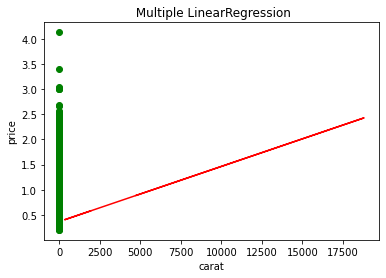

In [72]:
plot.scatter(y_test,y_test,color='green')
plot.plot(x_test,y_pred,color='red')
plot.title(' Multiple LinearRegression')
plot.xlabel('carat')
plot.ylabel('price')
plot.show()


In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(y_test,y_pred)

0.03291100967224181

In [74]:
mean_absolute_error(y_test,y_pred)

0.13359100700724863

In [75]:
r2_score(y_test,y_pred)

0.8516065939452341

In [79]:
dataset.to_csv("dataset.csv")